**Speech Emotion Recognition (SER)**

Speech Emotion Recognition (SER) is one of the most challenging tasks in speech signal analysis domain, it is a research area problem which tries to infer the emotion from the speech signals. The importance of emotion recognition is getting popular with improving user experience and the engagement of Voice User Interfaces (VUIs). For example, customer services, recommender systems, and healthcare applications.

**Objective:** 

In this mini project,Building and training simple Speech Emotion Recognizer that predicts human emotions from audio files using Python, Sci-kit learn, librosa, and Keras. firstly, we will load the data (TESS dataset), extract features (MFCC) from it, and split it into training and testing sets. Then, we will initialize two models (MLP and LSTM) as emotion classifiers and train them. Finally, we will calculate the accuracy of our models.

**The whole pipeline is as follows (as same as any machine learning pipeline):**

* (1)Loading the Dataset: This process is about loading the dataset in Python which involves extracting audio features, such as MFCC
* (2)Training the Model: After we prepare and load the dataset, we simply train it on a suited model.
* (3)Testing the Model: Measuring how good our model is doing.

**Import Python Packages:**

In [10]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [11]:
#Load the Dataset
import os

# Specify the path to your dataset folder
dataset_folder = r'C:\Users\chada\OneDrive\Desktop\TESS Toronto emotional speech set data'

paths = []
labels = []

# Walk through the dataset folder
for dirname, _, filenames in os.walk(dataset_folder):
    for filename in filenames:
        # Append the full path of the file to the paths list
        paths.append(os.path.join(dirname, filename))
        
        # Extract the label from the filename (modify this based on your filenames)
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        
        # Convert the label to lowercase and append to the labels list
        labels.append(label.lower())
    
    # Break the loop if the desired number of paths is reached
    if len(paths) == 2800:
        break

# Print a message indicating that the dataset is loaded
print('Dataset is Loaded')


Dataset is Loaded


In [40]:
#The paths of the speech data has been loaded for further processing

#Filenames were split and appended as labels

#To ensure proper processing all characters were converted to lower case


In [12]:
len(paths)

2800

In [41]:
#No. of samples in the dataset

In [13]:
paths[:5]

['C:\\Users\\chada\\OneDrive\\Desktop\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'C:\\Users\\chada\\OneDrive\\Desktop\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'C:\\Users\\chada\\OneDrive\\Desktop\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'C:\\Users\\chada\\OneDrive\\Desktop\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'C:\\Users\\chada\\OneDrive\\Desktop\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [42]:
#First five path files in the dataset

In [14]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [15]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

speech  label
0  C:\Users\chada\OneDrive\Desktop\TESS Toronto e...  angry
1  C:\Users\chada\OneDrive\Desktop\TESS Toronto e...  angry
2  C:\Users\chada\OneDrive\Desktop\TESS Toronto e...  angry
3  C:\Users\chada\OneDrive\Desktop\TESS Toronto e...  angry
4  C:\Users\chada\OneDrive\Desktop\TESS Toronto e...  angry

In [43]:
#File path is the input data

#Label is the output data

In [16]:
df['label'].value_counts()

angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: label, dtype: int64

In [44]:
#List of classes in the data set and the amount of samples per class

## Exploratory Data Analysis

<Axes: xlabel='label', ylabel='count'>

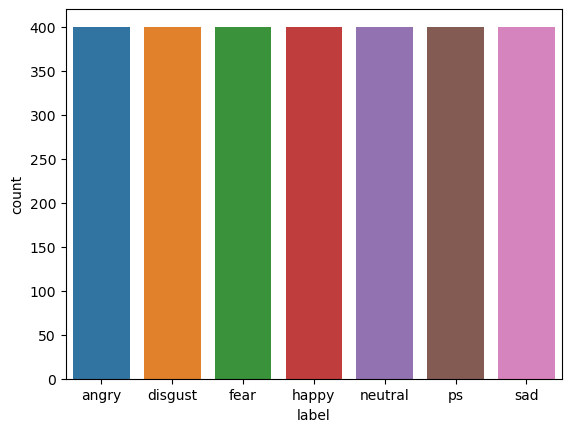

In [17]:
sns.countplot(data=df, x='label')

In [45]:
#All classes in equal distribution

#For unequal distribution, you must balance the distribution between classes

In [18]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

In [46]:
#Waveplot is to view the waveform of the audio file

#Spectrogram is to view the frequency levels of the audio file

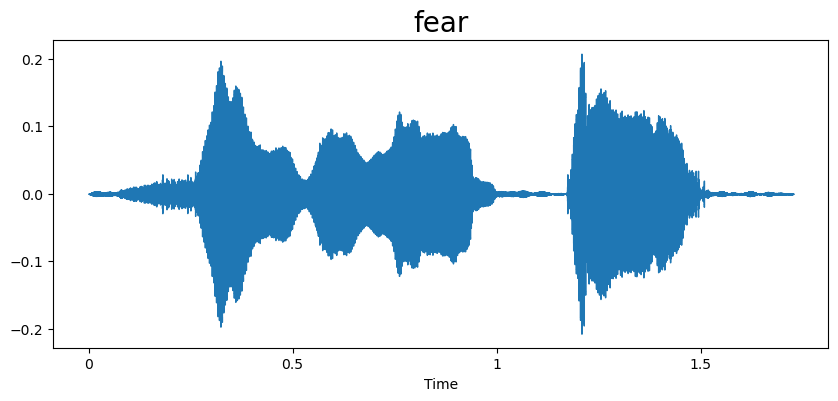

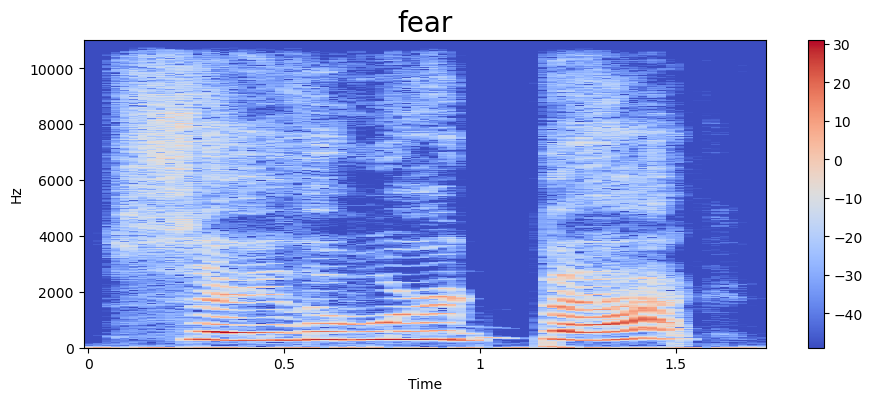

In [19]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

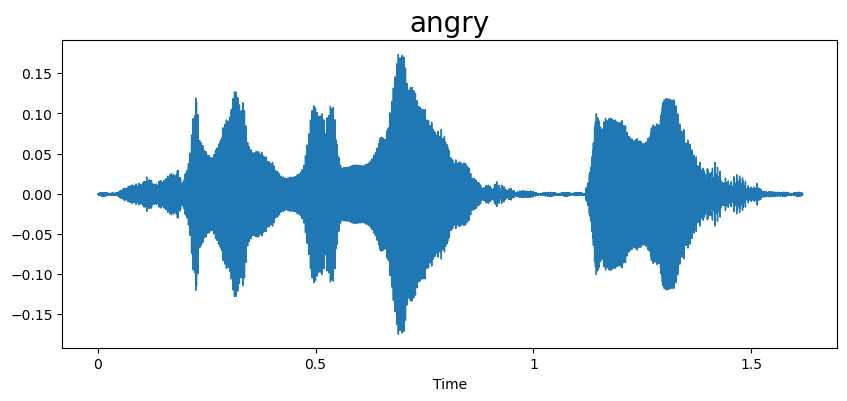

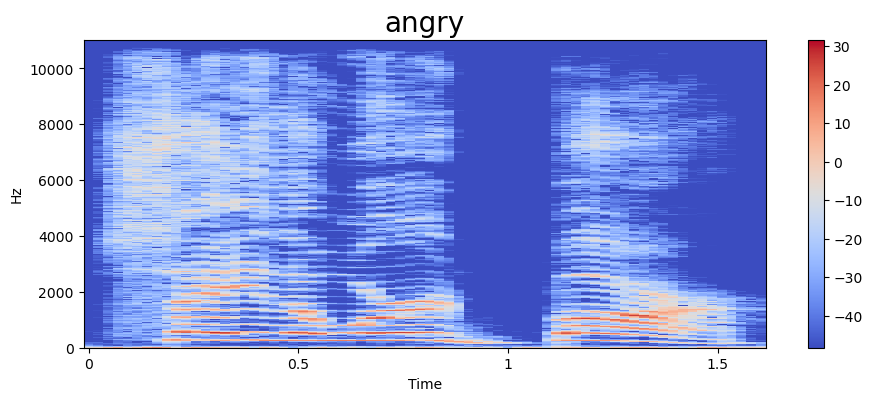

In [20]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

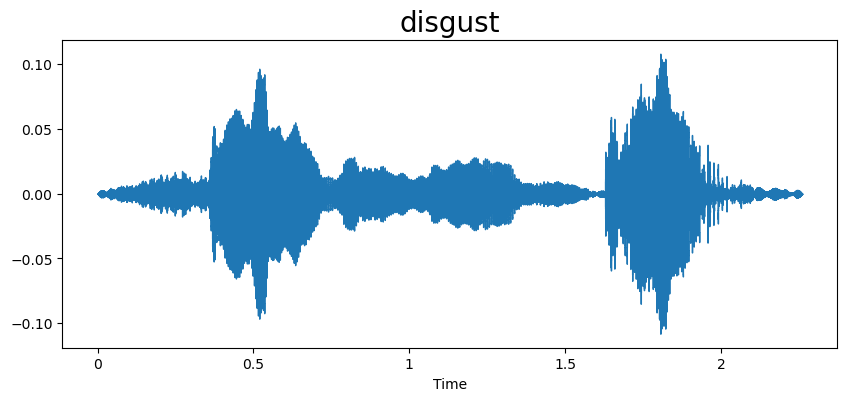

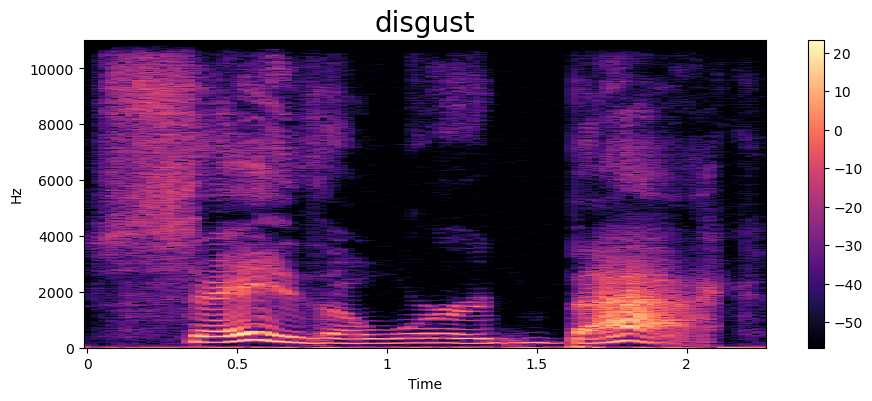

In [21]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

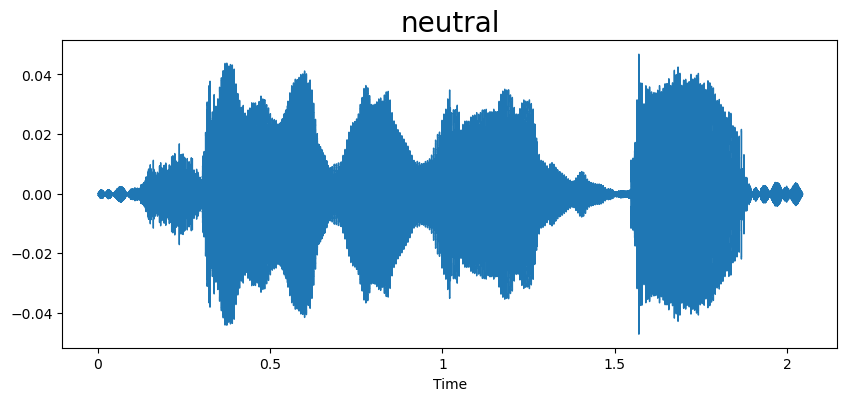

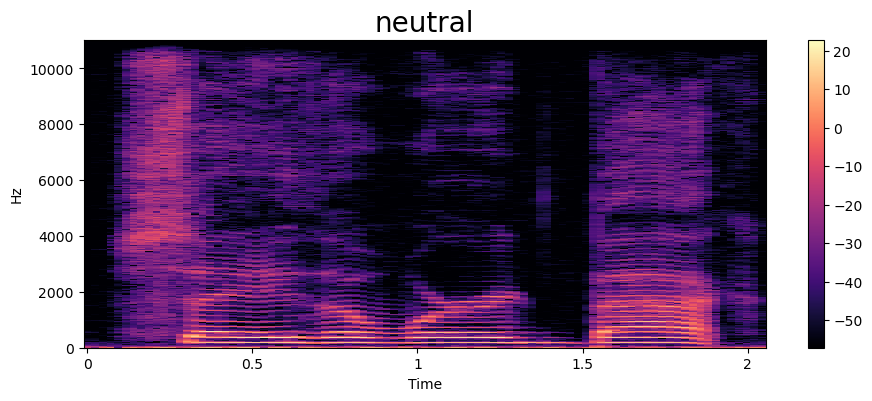

In [22]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

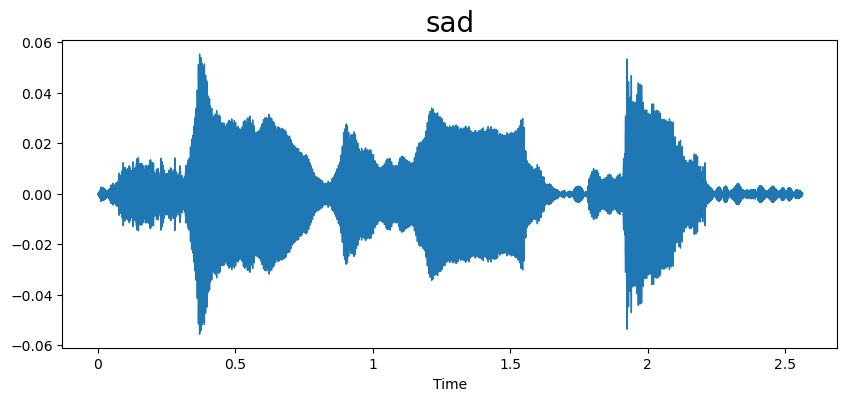

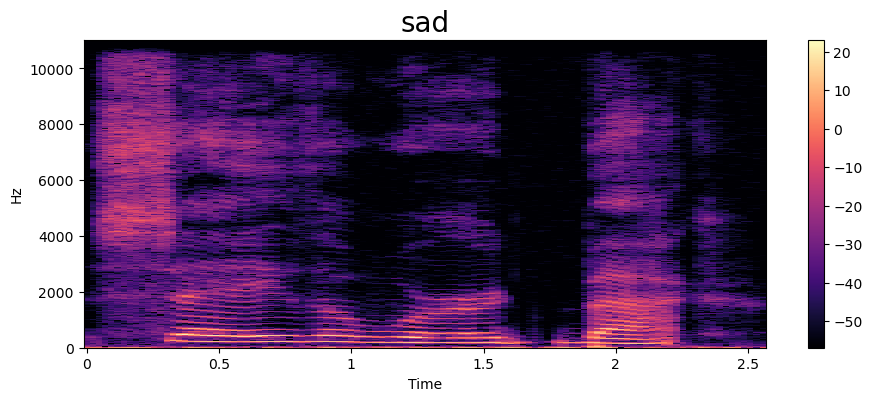

In [23]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

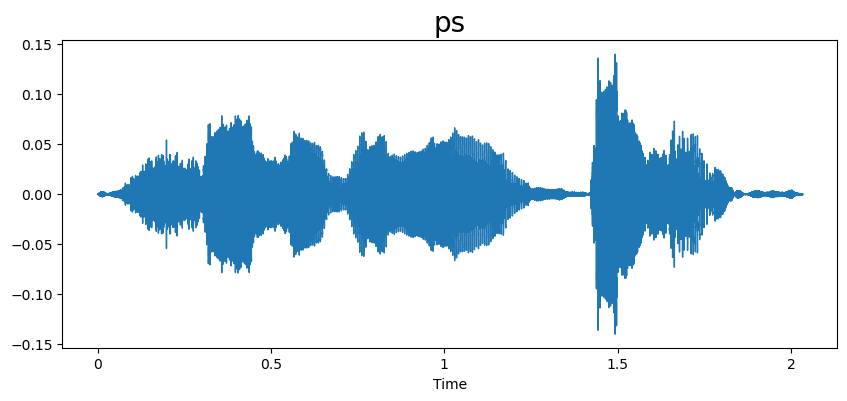

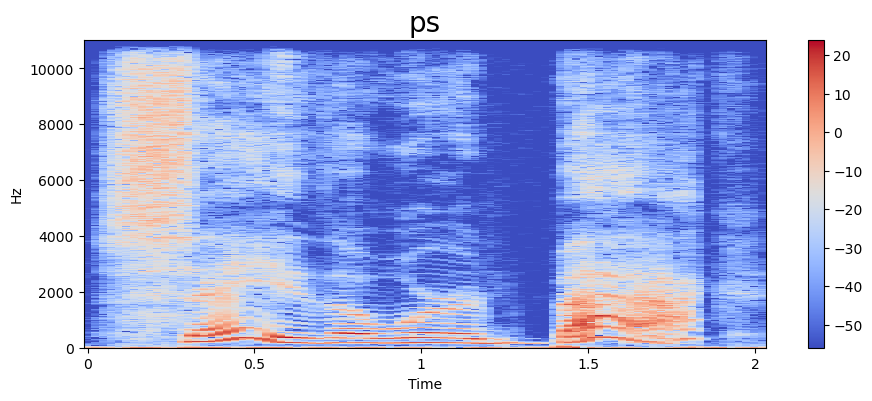

In [24]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

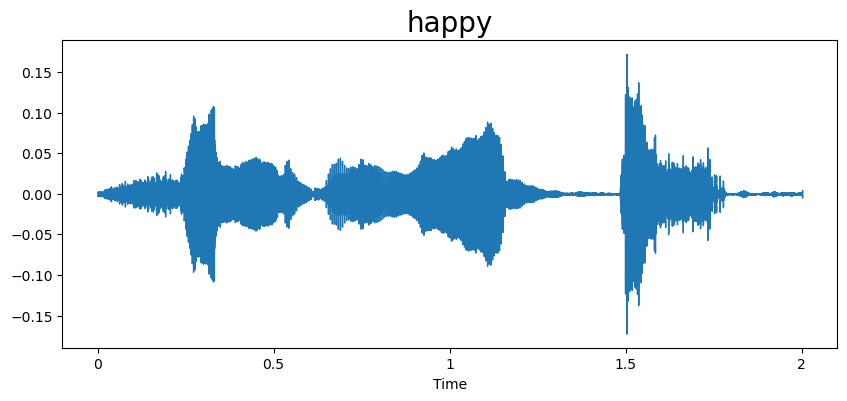

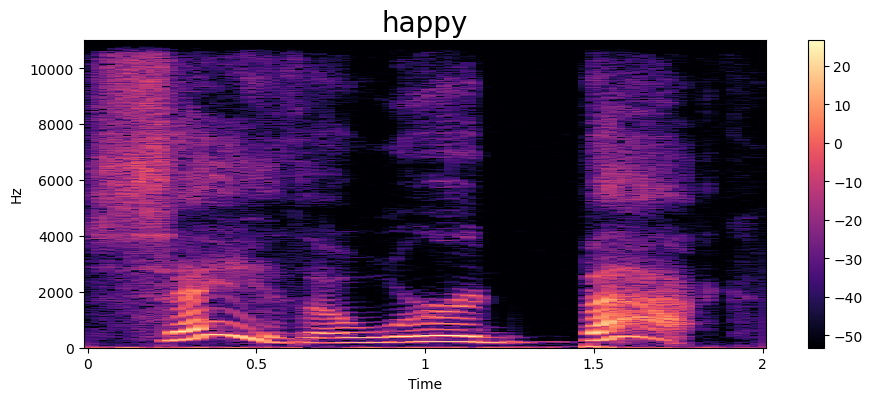

In [25]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [47]:
#Waveplot and spectrogram of an audio file from each class is plotted

#Sample audio of emotion speech from each class is displayed

#Lower pitched voices have darker colors

#Higher pitched voices have more brighter colors

## Feature Extraction

In [26]:
#Now we define a feature extraction function for the audio files
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [48]:
#Audio duration capped to max 3 seconds for equal duration of file size

#It will extract the Mel-frequency cepstral coefficients (MFCC) features with the limit of 40 and take the mean as the final feature

In [27]:
extract_mfcc(df['speech'][0])

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275506e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228361e+00, -5.57365894e-01, -1.83255327e+00,  2.02101514e-01,
        7.27550924e-01,  1.31773770e+00,  2.88633752e+00,  2.85579133e+00,
       -4.71292162e+00, -4.43651056e+00, -1.62115920e+00, -1.02398405e+01,
       -7.55126286e+00, -1.79688025e+00, -7.03765202e+00,  9.43658447e+00,
        8.35585499e+00,  2.17123604e+01,  1.92169895e+01,  2.03489265e+01,
        1.34133663e+01,  8.33917141e+00,  3.94722492e-01,  5.11131430e+00,
        9.56873894e+00,  5.45486784e+00,  2.50996351e+00, -1.82390726e+00,
        4.86896276e+00,  9.31392288e+00,  2.08915019e+00, -1.90649128e+00],
      dtype=float32)

In [28]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [49]:
#Returns extracted features from all the audio files

In [29]:
X_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.6560087, -32.74544, -...
2       [-429.79196, 46.124, 1.5550478, -0.2170951, 2....
3       [-403.46118, 76.32369, -12.531774, -22.288858,...
4       [-434.05756, 77.4455, 10.865499, 16.092943, 8....
                              ...                        
2795    [-553.2201, 89.83577, 27.215466, 16.407124, 19...
2796    [-589.23676, 96.20408, 36.96118, 15.014447, 28...
2797    [-533.41815, 85.43242, 27.791998, 19.307178, 2...
2798    [-548.6142, 110.16424, 31.910236, 12.572517, 2...
2799    [-549.2962, 102.37456, 32.268833, 26.261614, 3...
Name: speech, Length: 2800, dtype: object

In [50]:
#Visualization of the features extracted from the data

#The more samples in the dataset, the longer the processing time

In [30]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [51]:
#The shape represents the number of samples in the dataset and features in a single dimension array

In [31]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [32]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [33]:
y = y.toarray()

In [34]:
y.shape

(2800, 7)

In [52]:
#The shape represents the number of samples and number of output classes

## Create the LSTM Model

In [35]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 7)                

In [54]:
#Dense - single dimension linear layer with hidden units

#Dropout - used to add regularization to the data, avoiding over fitting & dropping out a fraction of the data

#Loss='sparse_categorical_crossentropy' - computes the cross-entropy loss between true labels and predicted labels.

#Optimizer='adam' - automatically adjust the learning rate for the model over the number of epochs

# Now we train the model

In [36]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50


35/35 [==============================] - 17s 315ms/step - loss: 1.0854 - accuracy: 0.6098 - val_loss: 1.0681 - val_accuracy: 0.4607
Epoch 2/50
35/35 [==============================] - 9s 263ms/step - loss: 0.3848 - accuracy: 0.8710 - val_loss: 0.6382 - val_accuracy: 0.7804
Epoch 3/50
35/35 [==============================] - 9s 248ms/step - loss: 0.2712 - accuracy: 0.9098 - val_loss: 0.3475 - val_accuracy: 0.8875
Epoch 4/50
35/35 [==============================] - 8s 240ms/step - loss: 0.1808 - accuracy: 0.9487 - val_loss: 0.1097 - val_accuracy: 0.9607
Epoch 5/50
35/35 [==============================] - 8s 242ms/step - loss: 0.1092 - accuracy: 0.9661 - val_loss: 0.4146 - val_accuracy: 0.8964
Epoch 6/50
35/35 [==============================] - 8s 242ms/step - loss: 0.1176 - accuracy: 0.9679 - val_loss: 0.0964 - val_accuracy: 0.9607
Epoch 7/50
35/35 [==============================] - 9s 249ms/step - loss: 0.0932 - accuracy: 0.9737 - val_loss: 0.0276 - val_accuracy: 0.9893
Epo

In [37]:
# best val accuracy: 72.32
# use checkpoint to save the best val accuracy model
# adjust learning rate for slow convergence

In [55]:
#Display of the results during each epoch of training

#batch_size=64 - amount of data to process per step

#epochs=50 - no. of iterations for training the model

#validation_split=0.2 - train and test split percentage

#The training accuracy and validation accuracy increases each iteration

#best validation accuracy is 72.32

#use checkpoint to save the best validation accuracy model

#adjust learning rate for slow convergence

## Plot the results

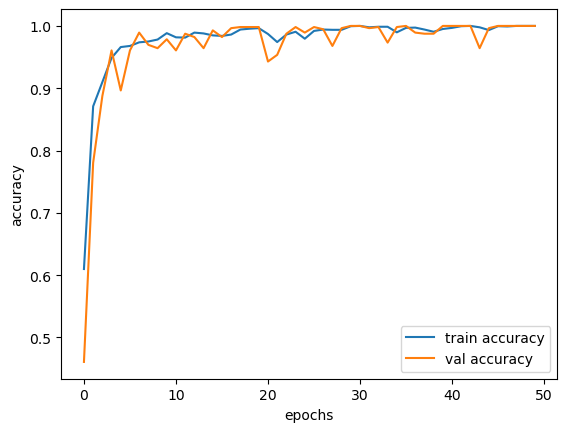

In [38]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

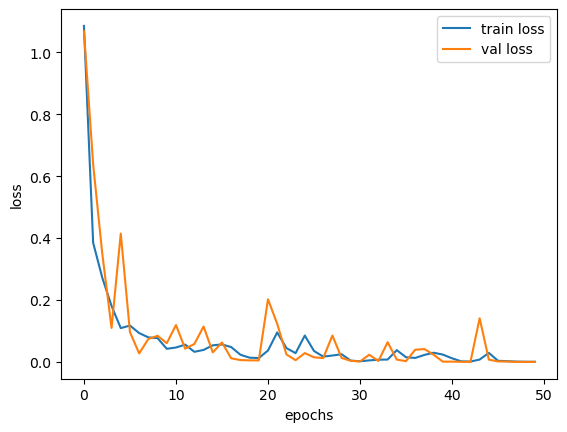

In [39]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()